# STD & me

Analysis of 2014 data from the CDC on the prevalence of STD's in U.S. counties. 

In [74]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
# Always display all the columns
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 200) 

# Plain Seaborn figures with matplotlib color codes mapped to the default seaborn palette 
sns.set(style="white", color_codes=True)

In [125]:
df = pd.read_csv("../data/chlamydia.csv")

In [126]:
df.shape

(3228, 12)

In [127]:
df.columns

Index(['Disease', 'Area', 'State Abbreviation', 'FIPS', 'Year', 'Race', 'Sex', 'Age group', 'Transmission Category', 'Population', 'Cases', 'Rate'], dtype='object')

In [128]:
df.dtypes

Disease                  object
Area                     object
State Abbreviation       object
FIPS                      int64
Year                      int64
Race                     object
Sex                      object
Age group                object
Transmission Category    object
Population               object
Cases                    object
Rate                     object
dtype: object

In [129]:
df_test = df.convert_objects(convert_numeric=True)
df_test.dtypes

/Users/akuepper/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


Disease                   object
Area                      object
State Abbreviation        object
FIPS                       int64
Year                       int64
Race                      object
Sex                       object
Age group                 object
Transmission Category     object
Population               float64
Cases                    float64
Rate                     float64
dtype: object

In [130]:
df_test.head()

,Disease,Area,State Abbreviation,FIPS,Year,Race,Sex,Age group,Transmission Category,Population,Cases,Rate
0,Chlamydia,Autauga County,AL,1001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,NaN,220,398.2
1,Chlamydia,Baldwin County,AL,1003,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,NaN,667,341.1
2,Chlamydia,Barbour County,AL,1005,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,NaN,166,613.1
3,Chlamydia,Bibb County,AL,1007,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,NaN,100,444.2
4,Chlamydia,Blount County,AL,1009,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,NaN,72,124.4


In [131]:
df['Population'] = df['Population'].str.replace(',','')
df['Cases'] = df['Cases'].str.replace(',','')

In [132]:
df = df.convert_objects(convert_numeric=True)
df.dtypes

/Users/akuepper/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


Disease                   object
Area                      object
State Abbreviation        object
FIPS                       int64
Year                       int64
Race                      object
Sex                       object
Age group                 object
Transmission Category     object
Population               float64
Cases                    float64
Rate                     float64
dtype: object

In [133]:
df.head()

,Disease,Area,State Abbreviation,FIPS,Year,Race,Sex,Age group,Transmission Category,Population,Cases,Rate
0,Chlamydia,Autauga County,AL,1001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,55246,220,398.2
1,Chlamydia,Baldwin County,AL,1003,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,195540,667,341.1
2,Chlamydia,Barbour County,AL,1005,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,27076,166,613.1
3,Chlamydia,Bibb County,AL,1007,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,22512,100,444.2
4,Chlamydia,Blount County,AL,1009,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,57872,72,124.4


In [134]:
df['Population'].describe()

count        3220.000000
mean        99360.995963
std        318648.364529
min            90.000000
25%         11267.750000
50%         26165.500000
75%         66834.250000
max      10017068.000000
Name: Population, dtype: float64

In [135]:
df['Population'].idxmax()

207

In [136]:
df.loc[207]

Disease                                    Chlamydia
Area                              Los Angeles County
State Abbreviation                                CA
FIPS                                            6037
Year                                            2014
Race                           All races/ethnicities
Sex                                       Both sexes
Age group                             All age groups
Transmission Category    All transmission categories
Population                               1.00171e+07
Cases                                          54881
Rate                                           547.9
Name: 207, dtype: object

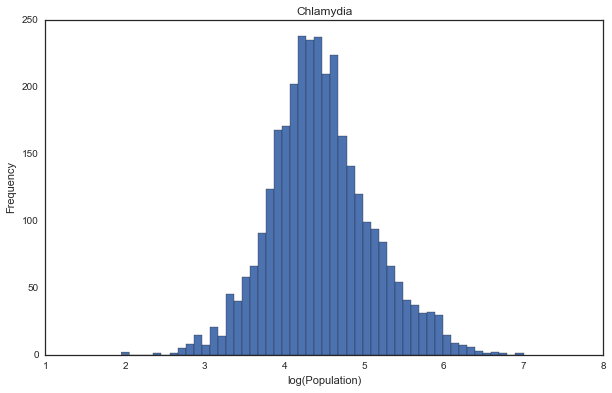

In [137]:
fig = plt.figure(figsize=(10, 6))
data = np.log10(df['Population'])
ax = data.plot.hist(50)
ax.set_xlabel("log(Population)")
ax.set_title("Chlamydia")
plt.savefig('../graphics/county_population.png', bbox_inches='tight', dpi=150)

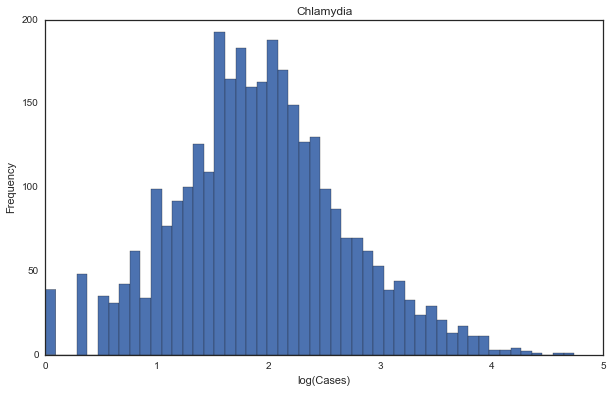

In [138]:
fig = plt.figure(figsize=(10, 6))
data = np.log10(df['Cases']+1)
ax = data.plot.hist(50)
ax.set_xlabel("log(Cases)")
ax.set_title("Chlamydia")
plt.savefig('../graphics/county_cases.png', bbox_inches='tight', dpi=150)

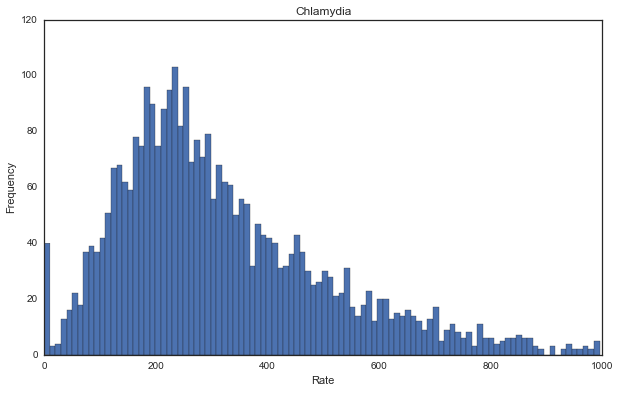

In [139]:
fig = plt.figure(figsize=(10, 6))
ax = df['Rate'].plot.hist(100)
ax.set_xlabel("Rate")
ax.set_title("Chlamydia")
plt.savefig('../graphics/county_rate.png', bbox_inches='tight', dpi=150)

In [140]:
outliers = df[df['Rate']<50]

In [141]:
outliers

,Disease,Area,State Abbreviation,FIPS,Year,Race,Sex,Age group,Transmission Category,Population,Cases,Rate
88,Chlamydia,Prince of Wales - Outer Ketchikan,AK,2201,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,5786,0,0.0
96,Chlamydia,Wrangell-Petersburg Census Area,AK,2280,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,6174,0,0.0
256,Chlamydia,Cheyenne County,CO,8017,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,1890,0,0.0
274,Chlamydia,Hinsdale County,CO,8053,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,813,0,0.0
278,Chlamydia,Kiowa County,CO,8061,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,1423,0,0.0
322,Chlamydia,District Of Columbia,DC,11001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,646449,2,0.3
551,Chlamydia,Kalawao County,HI,15005,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,90,0,0.0
565,Chlamydia,Butte County,ID,16023,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,2642,1,37.9
586,Chlamydia,Madison County,ID,16065,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,37450,15,40.1
902,Chlamydia,Cheyenne County,KS,20023,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,2694,1,37.1


People in D.C. don't have Chlamydia. Or so it seems.

I will have to remove the entries with very low numbers of Chlamydia cases.

In [151]:
len(df['Area'].unique())

1962

In [147]:
df.shape

(3228, 12)

In [152]:
df.sort_values(by='Area')

,Disease,Area,State Abbreviation,FIPS,Year,Race,Sex,Age group,Transmission Category,Population,Cases,Rate
2319,Chlamydia,Abbeville County,SC,45001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,25007,117,467.9
1116,Chlamydia,Acadia Parish,LA,22001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,62204,285,458.2
2823,Chlamydia,Accomack County,VA,51001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,33148,262,790.4
554,Chlamydia,Ada County,ID,16001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,416464,1529,367.1
996,Chlamydia,Adair County,KY,21001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,18732,46,245.6
1486,Chlamydia,Adair County,MO,29001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,25572,70,273.7
792,Chlamydia,Adair County,IA,19001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,7472,7,93.7
2134,Chlamydia,Adair County,OK,40001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,22194,128,576.7
1657,Chlamydia,Adams County,NE,31001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,31610,87,275.2
700,Chlamydia,Adams County,IN,18001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,34614,43,124.2


In [153]:
df['Area'].value_counts()

Washington County       30
Jefferson County        25
Franklin County         24
Lincoln County          23
Jackson County          23
Madison County          19
Montgomery County       18
Clay County             18
Monroe County           17
Union County            17
Marion County           17
Wayne County            16
Warren County           14
Greene County           14
Grant County            14
Carroll County          13
Lake County             12
Adams County            12
Johnson County          12
Lee County              12
Polk County             12
Clark County            12
Douglas County          12
Marshall County         12
Crawford County         11
Scott County            11
Calhoun County          11
Lawrence County         11
Morgan County           11
Fayette County          11
                        ..
Petersburg City          1
Sharp County             1
Luzerne County           1
San Germán Municipio     1
Gordon County            1
Shackelford County       1
G

## Get ZIP codes and FIPS codes for Counties

We will need a mapping function for ZIP codes and for FIPS codes. ZIP codes are used by USPS and are generally known by the users, whereas governmental studies and CDC data usually use FIPS codes for regions. 

In [159]:
df_fipszip= pd.read_csv("../data/COUNTY_ZIP_122014.csv", usecols={0,1})

In [160]:
df_fipszip.shape

(51280, 2)

In [234]:
df_fipszip.head()

,COUNTY,ZIP
0,1001,36051
1,1001,36066
2,1001,36703
3,1001,36068
4,1001,36749


In [162]:
df_zipfips= pd.read_csv("../data/ZIP_COUNTY_122014.csv", usecols={0,1})

In [164]:
df_zipfips.shape

(51280, 2)

In [165]:
df_zipfips.head()

,ZIP,COUNTY
0,501,36103
1,601,72001
2,602,72003
3,603,72005
4,604,72005


In [168]:
df_zipfips.dtypes

ZIP       int64
COUNTY    int64
dtype: object

In [188]:
zip2fips = dict(zip(df_zipfips["ZIP"], df_zipfips["COUNTY"]))

In [189]:
zip2fips[65536]

29105

In [230]:
fips2zip = {}

In [231]:
for fips in np.arange(len(df_fipszip.COUNTY)):
    if df_fipszip.COUNTY[fips] in fips2zip:
        fips2zip[df_fipszip.COUNTY[fips]].append(df_fipszip.ZIP[fips])
    else:
        fips2zip[df_fipszip.COUNTY[fips]] = []
        fips2zip[df_fipszip.COUNTY[fips]].append(df_fipszip.ZIP[fips])

In [233]:
fips2zip[1001]

[36051,
 36066,
 36703,
 36068,
 36749,
 36006,
 36067,
 36022,
 36091,
 36758,
 36003,
 36008]

In [201]:
df_fipszip.COUNTY[1]

1001